Notebook for cleaning and visualising health insurance data

In [ ]:
import pandas as pd  # pip install pandas
import plotly.express as px  # pip install pltoly
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns  # pip install seaborn
import numpy as np  # pip install nunpy

In [ ]:
# define datapath and load data into a dataframe
data = "../data/insurance.csv"
df = pd.read_csv(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# checking dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# check for unstandardized data
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [6]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
# check for incorrect data (negative age, bmi, children, charges, extreme values and so on)
df[["age", "bmi", "children", "charges"]].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# data looks clean from the get go
# lets check the relation of the health insurance charges to the other attributes
# convert nominal to binary/one_hot

df["smoker"] = df["smoker"].apply(lambda x: True if x == "yes" else False)
df["sex"] = df["sex"].apply(lambda x: True if x == "female" else False)
df = pd.get_dummies(df, columns=["region"], prefix="region")
df.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,True,27.900,0,True,16884.92400,False,False,False,True
1,18,False,33.770,1,False,1725.55230,False,False,True,False
2,28,False,33.000,3,False,4449.46200,False,False,True,False
3,33,False,22.705,0,False,21984.47061,False,True,False,False
4,32,False,28.880,0,False,3866.85520,False,True,False,False


In [ ]:
# change column in code for different plots

fig = px.scatter(df, x="age", y="charges", color="smoker")
fig.show()

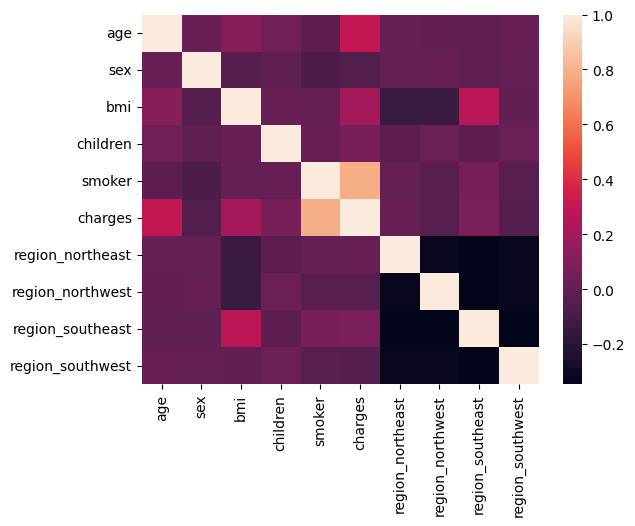

In [ ]:
df_corr = df.corr()
heat = sns.heatmap(df_corr)

In [18]:
df_corr.loc[:, "charges"]

age                 0.299008
sex                -0.057292
bmi                 0.198341
children            0.067998
smoker              0.787251
charges             1.000000
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

From the Visualisation of the Data, aswell as of the correlation Matrix, expectatly, the attributes smoker, bmi and age have the strongest correlation to the health insurance charches. The other features only have marginal impact on the healt insurance cost. Interestingly the feature sex aswell as some region features show a negative correlation. This can either be attributed to the general cost of living in the regions or a healthier lifestyle in the regions or by Women.

In [ ]:
# save the current df in the datafoder for modeltraining
df.to_csv("../data/insurance_encoded.csv", index=False)